In [20]:
import pandas as pd 
df = pd.read_csv("spain_energy_market.csv")
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


# Open Research Question: 

How much storage would spain need in a 100% renewables scenario (using demand data from between 2014-2018)?

1. We install enough Wind + Solar in Spain so that their total annual GWh produced equals Spain's total annual GWh demand.
 - Assume 50:50 split solar wind
 - Calculate Installed Capacity for Solar and Wind separately. 
3. We then use Supply(t) = Installed Capacity * Capacity Factor(t) to find a Supply(t) time series for both solar and wind.
4. We then calculate Residual(t) as Demand(t) - Supply(t)
5. Then the range of the cumulative sum of the Residual curve gives us the storage potential needed. 
6. Further research: what is the optimum Wind/Solar ratio to minimize the need for storage? 


In [19]:
demand_df = df[df['name']=='Demanda real']

In [16]:
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 20169 to 21993
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1825 non-null   object 
 1   id        1825 non-null   int64  
 2   name      1825 non-null   object 
 3   geoid     0 non-null      float64
 4   geoname   0 non-null      object 
 5   value     1825 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 99.8+ KB


In [17]:
demand_df.head()

,datetime,id,name,geoid,geoname,value
20169,2014-01-01 23:00:00,1293,Demanda real,NaN,NaN,28191.597222
20170,2014-01-02 23:00:00,1293,Demanda real,NaN,NaN,28465.180556
20171,2014-01-03 23:00:00,1293,Demanda real,NaN,NaN,26860.493056
20172,2014-01-04 23:00:00,1293,Demanda real,NaN,NaN,25333.597222
20173,2014-01-05 23:00:00,1293,Demanda real,NaN,NaN,23905.541667


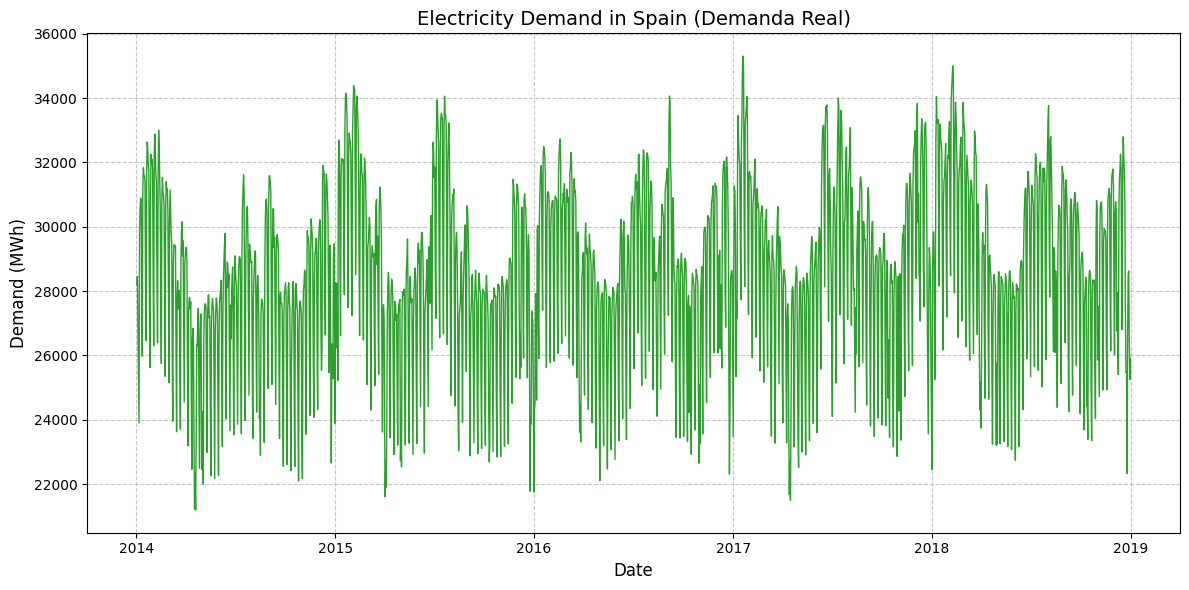

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv("spain_energy_market.csv")

# 2. Filter for real demand
demand_df = df[df['name'] == 'Demanda real'].copy()

# 3. CONVERSION STEP: Convert 'datetime' from object (string) to datetime objects
# This ensures the plot recognizes the dates correctly.
demand_df['datetime'] = pd.to_datetime(demand_df['datetime'])

# 4. Sort by date (important for time-series lines)
demand_df = demand_df.sort_values('datetime')

# 5. Create the plot
plt.figure(figsize=(12, 6))
plt.plot(demand_df['datetime'], demand_df['value'], color='#2ca02c', linewidth=1)

# Formatting
plt.title('Electricity Demand in Spain (Demanda Real)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand (MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show or Save
plt.show()
# plt.savefig('spain_demand_plot.png')

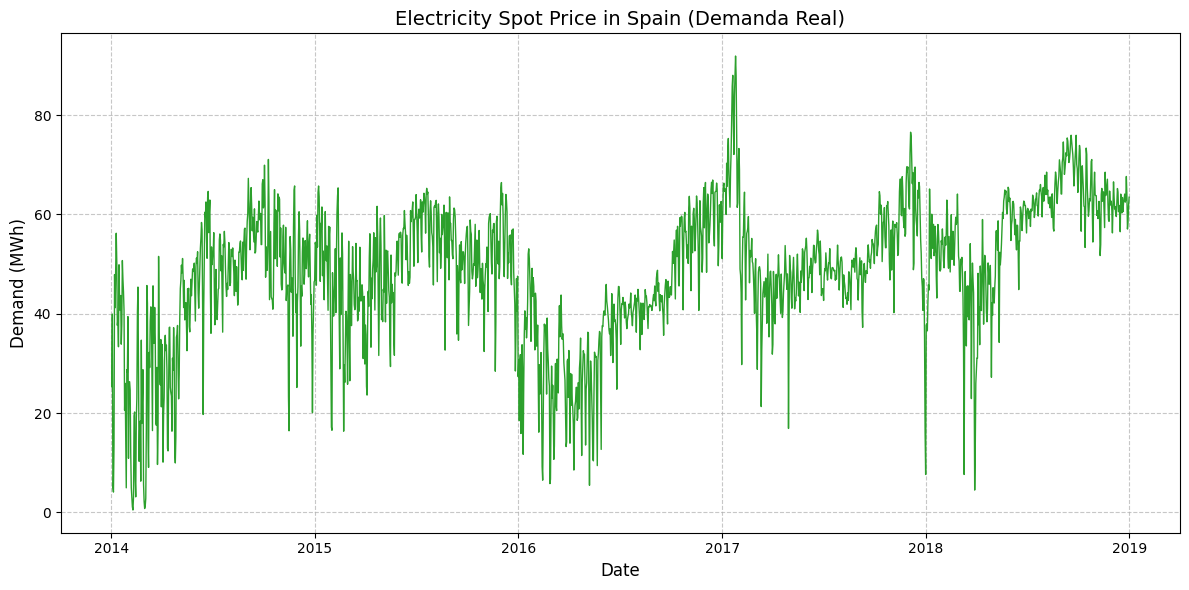

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
df = pd.read_csv("spain_energy_market.csv")

# 2. Filter for real demand
demand_df = df[df['name'] == 'Precio mercado SPOT Diario ESP'].copy()

# 3. CONVERSION STEP: Convert 'datetime' from object (string) to datetime objects
# This ensures the plot recognizes the dates correctly.
demand_df['datetime'] = pd.to_datetime(demand_df['datetime'])

# 4. Sort by date (important for time-series lines)
demand_df = demand_df.sort_values('datetime')

# 5. Create the plot
plt.figure(figsize=(12, 6))
plt.plot(demand_df['datetime'], demand_df['value'], color='#2ca02c', linewidth=1)

# Formatting
plt.title('Electricity Spot Price in Spain (Demanda Real)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand (MWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show or Save
plt.show()
# plt.savefig('spain_demand_plot.png')